# Ensemble study

## Common Parameters

In [7]:
sys.path.append("..") # Adds higher directory to python modules path.
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from utils import *
from helpers import *
from visuals import *
from data.data_loader import *

import pandas as pd
from sklearn.metrics import accuracy_score, balanced_accuracy_score, recall_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
from visuals import plot_confusion_matrix
from tensorflow.keras import utils
from keras_numpy_backend import categorical_crossentropy

from Augmentor import Operations
from Augmentor.Operations import *

%load_ext autoreload
%autoreload 2
%matplotlib inline

data_folder = "../data/isic2019/"
model_folder = 'models'
history_folder = 'history'
pred_result_folder_test = 'test_predict_results'

model_name = 'DenseNet201'
postfix = 'best_balanced_acc'

ensembles_info = read_ensembles(os.path.join("..", pred_result_folder_test))
models_info = read_models_info(history_folder, pred_result_folder_test)

training_image_folder = os.path.join(data_folder, 'ISIC_2019_Test_Input')
ground_truth_file = os.path.join(data_folder, 'ISIC_2019_Training_GroundTruth.csv')

df_ground_truth, known_category_names, unknown_category_name = load_isic_training_data(
    training_image_folder, 
    ground_truth_file
)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Ensemble of k-fold

### Data Analysis

Training data has 20264 samples.


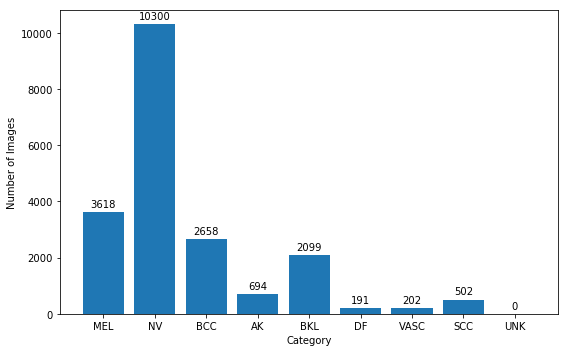

Test data has 5067 samples.


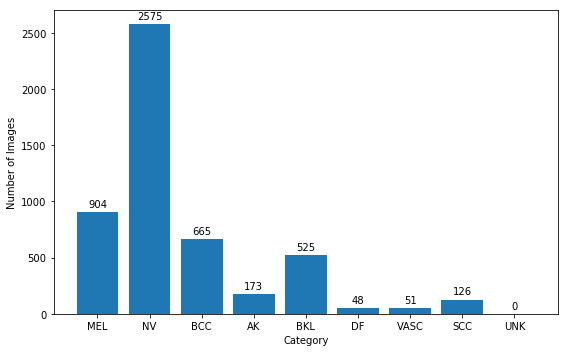

In [3]:
data_folder="../data/isic2019/sampled_unbalanced_20264_224"

all_category_names, count_per_category, df_ground_truth = get_count_per_category(data_folder)
total_sample_count = sum(count_per_category.values())
print("Training data has {} samples.".format(total_sample_count))

plot_class_dist(all_category_names, count_per_category).tight_layout()
plt.show()

all_category_names, count_per_category, df_ground_truth_test = get_count_per_category(data_folder, test=True)
total_sample_count = sum(count_per_category.values())
print("Test data has {} samples.".format(total_sample_count))

plot_class_dist(all_category_names, count_per_category).tight_layout()
plt.show()

### Ensemble of DenseNet201

	accuracy:  0.8644168146832445
	balanced_accuracy_score:  0.778104768989369


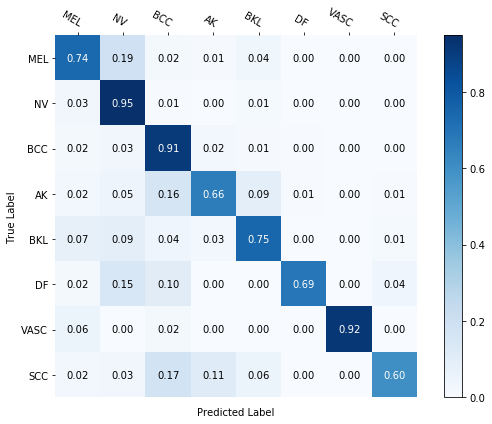

In [49]:
model_info = filter_models_info(
    models_info, 
    models=["DenseNet201"],
    parameters={
        "samples": 20264,
        "balanced": 0,
        "lambda": None,
        "feepochs": 2, 
        "felr": 0.001, 
        "ftlr": 0.0001, 
        "batch": 16,
        "dropout": None
    }
)[0]

# Load predicted results
df_pred = pd.read_csv(os.path.join(model_info["pred_test"], "no_unknown", f"{postfix}.csv"))
df = pd.merge(df_pred, df_ground_truth_test, on='image')
y_true = df['category']
y_pred = df['pred_category']
print('\taccuracy: ', accuracy_score(y_true, y_pred))
print('\tbalanced_accuracy_score: ', balanced_accuracy_score(y_true, y_pred))
fig = plot_confusion_matrix(
    y_true, 
    y_pred, 
    known_category_names, 
    normalize=True,
    figsize=(8, 6)
)

plt.show()
    
fig.savefig(os.path.join(f"densenet201_k_fold_ensemble.pdf"), format='pdf', bbox_inches='tight', pad_inches=0)

### Ensemble of EfficientNetB2

In [13]:
model_info = filter_models_info(
    models_info, 
    models=["EfficientNetB2"],
    parameters={
        "samples": 20264,
        "balanced": 0,
        "lambda": None,
        "feepochs": 2, 
        "felr": 0.001, 
        "ftlr": 0.0001, 
        "batch": 16,
        "dropout": None
    }
)[0]

# Load predicted results
df_pred = pd.read_csv(os.path.join(model_info["pred_test"], "no_unknown", f"{postfix}.csv"))
df = pd.merge(df_pred, df_ground_truth_test, on='image')
y_true = df['category']
y_pred = df['pred_category']
print('\taccuracy: ', accuracy_score(y_true, y_pred))
print('\tbalanced_accuracy_score: ', balanced_accuracy_score(y_true, y_pred))
fig = plot_confusion_matrix(
    y_true, 
    y_pred, 
    known_category_names, 
    normalize=True,
    figsize=(8, 6)
)

plt.show()
    
fig.savefig(os.path.join(f"efficientnetb2_k_fold_ensemble.pdf"), format='pdf', bbox_inches='tight', pad_inches=0)

ValueError: multilabel-indicator format is not supported

### Ensemble of InceptionResNetV2

	accuracy:  0.8622459048746793
	balanced_accuracy_score:  0.7878353466827928


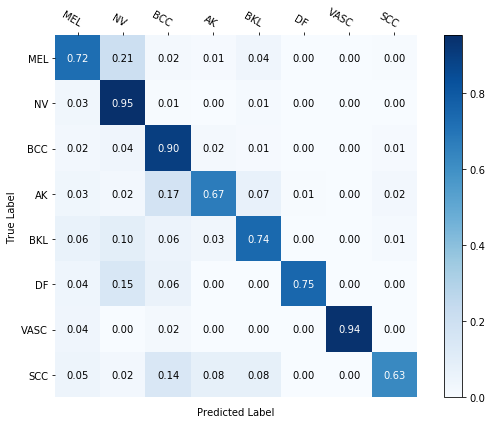

In [47]:
model_info = filter_models_info(
    models_info, 
    models=["InceptionResNetV2"],
    parameters={
        "samples": 20264,
        "balanced": 0,
        "lambda": None,
        "feepochs": 2, 
        "felr": 0.001, 
        "ftlr": 0.0001, 
        "batch": 16,
        "dropout": None
    }
)[0]


# Load predicted results
df_pred = pd.read_csv(os.path.join(model_info["pred_test"], "no_unknown", f"{postfix}.csv"))
df = pd.merge(df_pred, df_ground_truth_test, on='image')
y_true = df['category']
y_pred = df['pred_category']
print('\taccuracy: ', accuracy_score(y_true, y_pred))
print('\tbalanced_accuracy_score: ', balanced_accuracy_score(y_true, y_pred))
fig = plot_confusion_matrix(
    y_true, 
    y_pred, 
    known_category_names, 
    normalize=True,
    figsize=(8, 6)
)

plt.show()
    
fig.savefig(os.path.join(f"inceptionresnetv2_k_fold_ensemble.pdf"), format='pdf', bbox_inches='tight', pad_inches=0)

### Ensemble of the 3

	accuracy:  0.8719163212946517
	balanced_accuracy_score:  0.7950402322932018


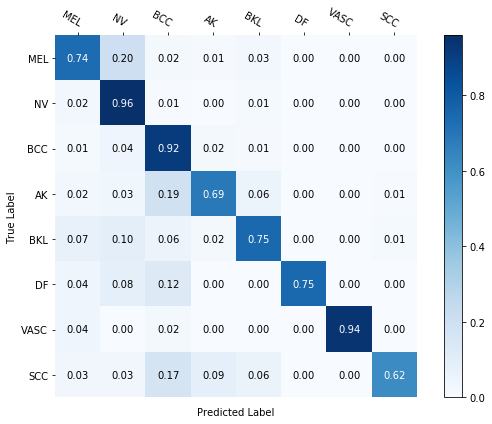

In [51]:
# Load predicted results
df_pred = pd.read_csv(os.path.join(
    "..", 
    pred_result_folder_test, 
    "DenseNet201_5-EfficientNetB2_5-InceptionResNetV2_5", 
    "no_unknown", 
    f"{postfix}.csv"
))
df = pd.merge(df_pred, df_test_ground_truth, on='image')
y_true = df['category']
y_pred = df['pred_category']
print('\taccuracy: ', accuracy_score(y_true, y_pred))
print('\tbalanced_accuracy_score: ', balanced_accuracy_score(y_true, y_pred))
fig = plot_confusion_matrix(
    y_true, 
    y_pred, 
    known_category_names, 
    normalize=True,
    figsize=(8, 6)
)

plt.show()
    
# fig.savefig(os.path.join(f"inceptionresnetv2_densenet201_efficientnetb2_k_fold_ensemble.pdf"), format='pdf', bbox_inches='tight', pad_inches=0)

# Ensemble different pre-trained model architectures (no k-fold ensemble)

### Data Analysis

Training data has 82400 samples.


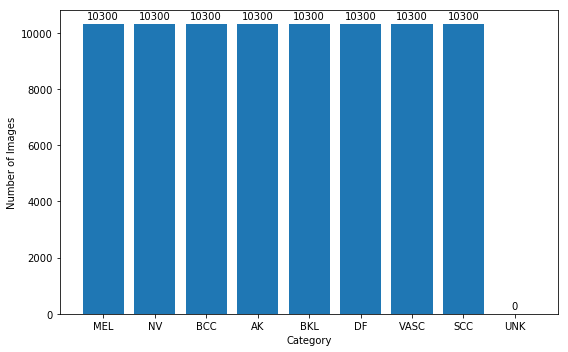

Test data has 5067 samples.


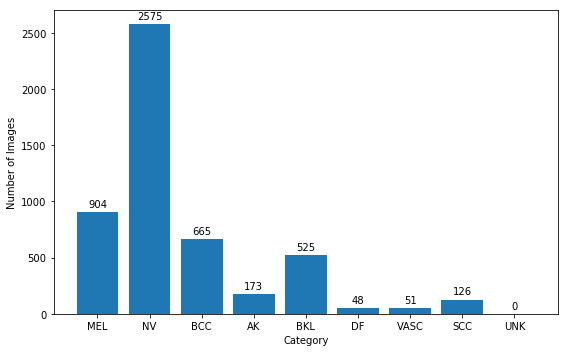

In [34]:
data_folder="../data/isic2019/sampled_balanced_82400_300"

all_category_names, count_per_category, df_ground_truth = get_count_per_category(data_folder)
total_sample_count = sum(count_per_category.values())
print("Training data has {} samples.".format(total_sample_count))

plot_class_dist(all_category_names, count_per_category).tight_layout()
plt.show()

all_category_names, count_per_category, df_ground_truth_test = get_count_per_category(data_folder, test=True)
total_sample_count = sum(count_per_category.values())
print("Test data has {} samples.".format(total_sample_count))

plot_class_dist(all_category_names, count_per_category).tight_layout()
plt.show()

### Ensemble

MODEL ANALYSIS
Model: VGG16
	accuracy:  0.8237615946319321
	balanced_accuracy_score:  0.7533419200245823
Model: ResNet152
	accuracy:  0.8582987961318335
	balanced_accuracy_score:  0.7974510214703228
Model: DenseNet201
	accuracy:  0.8669824353660943
	balanced_accuracy_score:  0.8153432324855604
Model: InceptionResNetV2
	accuracy:  0.8616538385632524
	balanced_accuracy_score:  0.8108706768401939
Model: EfficientNetB2
	accuracy:  0.850601934083284
	balanced_accuracy_score:  0.8204461364884201
Model: InceptionV3
	accuracy:  0.8472468916518651
	balanced_accuracy_score:  0.8025161950191556
ENSEMBLE COMBINATIONS
Models: ['DenseNet201_1', 'EfficientNetB2_1', 'InceptionResNetV2_1']
	accuracy:  0.8912571541345964
	balanced_accuracy_score:  0.8461677329420101


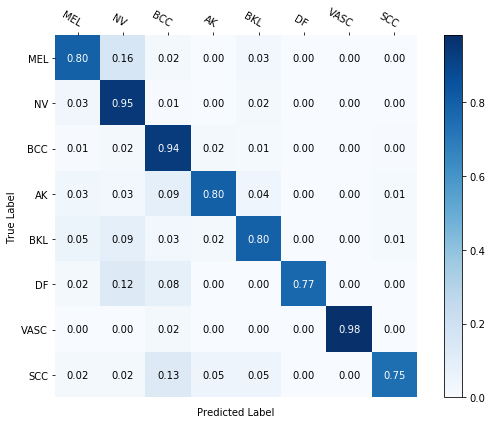

Models: ['DenseNet201_1', 'EfficientNetB2_1', 'InceptionV3_1']
	accuracy:  0.8849417801460431
	balanced_accuracy_score:  0.8410019158131099


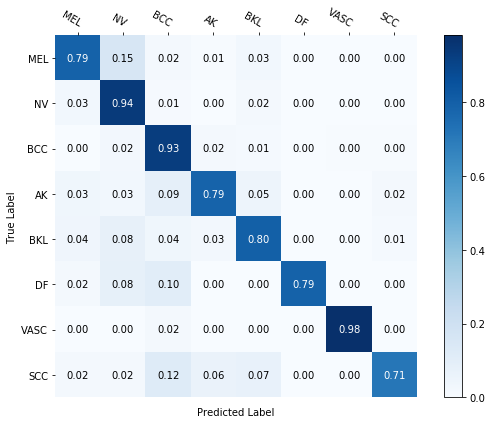

Models: ['DenseNet201_1', 'InceptionResNetV2_1', 'ResNet152_1']
	accuracy:  0.8918492204460233
	balanced_accuracy_score:  0.8308006974284416


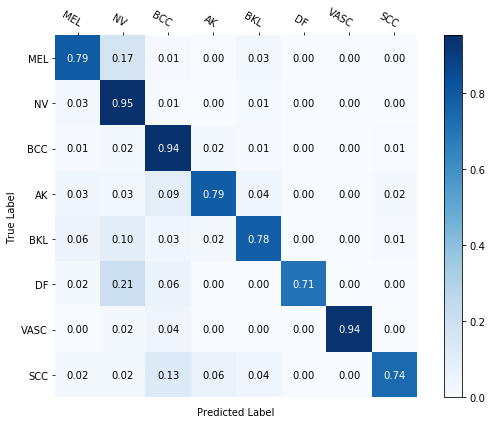

Models: ['DenseNet201_1', 'InceptionV3_1', 'ResNet152_1']
	accuracy:  0.8839550029603316
	balanced_accuracy_score:  0.8267219584106011


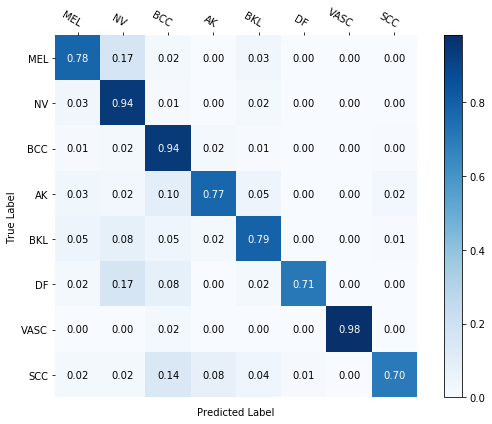

Models: ['DenseNet201_1', 'ResNet152_1']
	accuracy:  0.8833629366489046
	balanced_accuracy_score:  0.8192574833908918


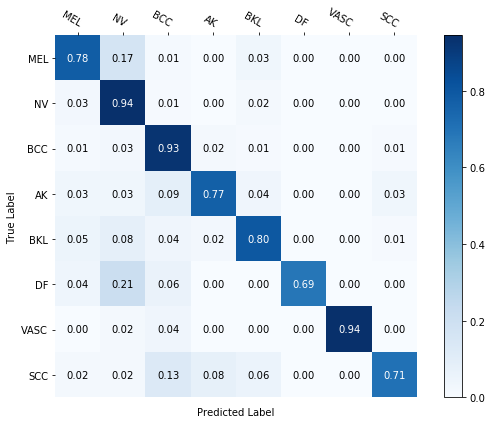

Models: ['DenseNet201_5', 'EfficientNetB2_5', 'InceptionResNetV2_5']
	accuracy:  0.8719163212946517
	balanced_accuracy_score:  0.7950402322932018


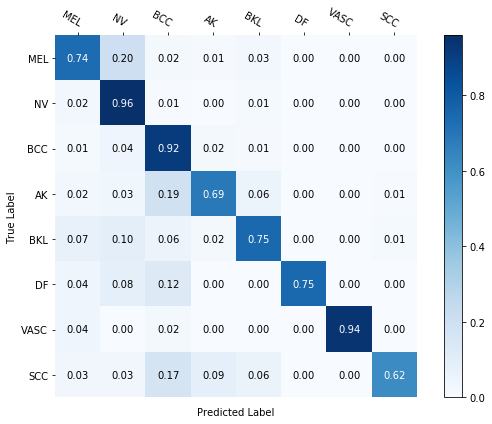

Models: ['DenseNet201_0', 'EfficientNetB2_0', 'InceptionResNetV2_0', 'ResNet152_0', 'VGG16_0']
	accuracy:  0.8934280639431617
	balanced_accuracy_score:  0.8350758195500441


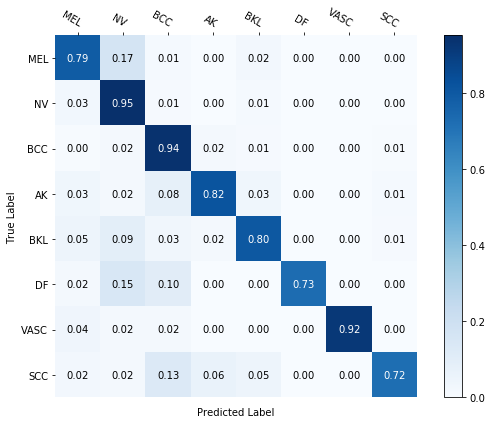

Models: ['DenseNet201_0', 'EfficientNetB2_0']
	accuracy:  0.8782316952832051
	balanced_accuracy_score:  0.8421366898199583


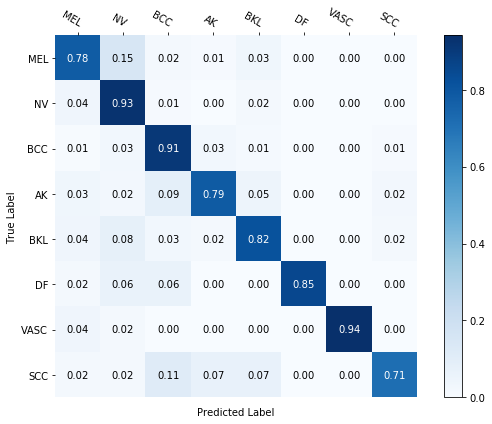

Models: ['DenseNet201_0', 'EfficientNetB2_0', 'InceptionResNetV2_0', 'ResNet152_0']
	accuracy:  0.8944148411288732
	balanced_accuracy_score:  0.8407415332141881


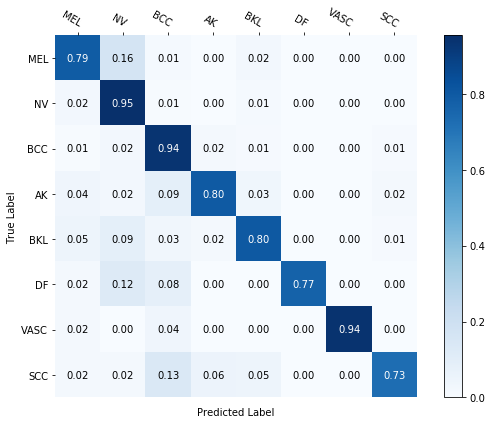

In [68]:
postfix = 'best_balanced_acc'
data_folder = "../data/isic2019/sampled_balanced_82400_300"

test_image_folder = os.path.join(data_folder, 'ISIC_2019_Test_Input')
test_ground_truth_file = os.path.join(data_folder, 'ISIC_2019_Test_GroundTruth.csv')
df_test_ground_truth, known_category_names, unknown_category_name = load_isic_training_data(
    test_image_folder, 
    test_ground_truth_file,
    test=True
)

# print(filter_models_info(
#     models_info, 
#     parameters={
#         "samples": 82400,
#         "balanced": 1,
#         "lambda": None,
#         "feepochs": 2, 
#         "ftepochs": 100, 
#         "felr": 0.001, 
#         "ftlr": 0.0001, 
#         "batch": 16,
#         "dropout": None,
#         "dggroup": "11"
#     }
# ))

print("MODEL ANALYSIS")
for model_info in filter_models_info(
    models_info, 
    parameters={
        "samples": 82400,
        "balanced": 1,
        "lambda": None,
        "feepochs": 2, 
        "ftepochs": 100, 
        "felr": 0.001, 
        "ftlr": 0.0001, 
        "batch": 16,
        "dropout": None,
        "dggroup": "11"
    }
):
    # Load predicted results
    df_pred = pd.read_csv(os.path.join(model_info["pred_test_0"], "no_unknown", f"{postfix}.csv"))
    df = pd.merge(df_pred, df_test_ground_truth, on='image')
    y_true = df['category']
    y_pred = df['pred_category']
    acc = accuracy_score(y_true, y_pred)
    bma = balanced_accuracy_score(y_true, y_pred)
    print(f'Model: {model_info["model"]}')
    print('\taccuracy: ', acc)
    print('\tbalanced_accuracy_score: ', bma)

    
print("ENSEMBLE COMBINATIONS")

best_bma=[0.0, 0.0, 0.0, 0.0]
best_fig_conf_matrix=[None, None, None, None]
for ensemble in ensembles_info:
    # Load predicted results
    df_pred = pd.read_csv(os.path.join(ensemble["pred_test"], "no_unknown", f"{postfix}.csv"))
    df = pd.merge(df_pred, df_test_ground_truth, on='image')
    y_true = df['category']
    y_pred = df['pred_category']
    acc = accuracy_score(y_true, y_pred)
    bma = balanced_accuracy_score(y_true, y_pred)
    print(f'Models: {ensemble["models"]}')
    print('\taccuracy: ', acc)
    print('\tbalanced_accuracy_score: ', bma)
    fig = plot_confusion_matrix(
        y_true, 
        y_pred, 
        known_category_names, 
        normalize=True,
        figsize=(8, 6)
    )
    
    if bma > best_bma[len(ensemble["models"])-2]:
        best_bma[len(ensemble["models"])-2] = bma
        best_fig_conf_matrix[len(ensemble["models"])-2] = fig
    
    plt.show()
    
for i, fig in enumerate(best_fig_conf_matrix):   
    if fig is not None:
        best_fig_conf_matrix[i].savefig(os.path.join(f"best_ensembe_{i+2}.pdf"), format='pdf', bbox_inches='tight', pad_inches=0)